# Actividad NLP - 1.0 - Creación de Diccionario

### Musel Tabares
### A00830710

## Contador de palabras

In [2]:
#Importamos librerias
import matplotlib.pyplot as plt
import string
import nltk.metrics.distance
import numpy as np


In [3]:
#Funciones auxiliares para leer archivo y guardarlo en un diccionario
def list_from_file(filename):
    myfile = open(filename, 'r')
    data = myfile.read().split()
    col = []
    for word in data:
        col.append(word)
    return col

def myhist(col):
    hist = {}
    for word in col:
        word = word.lower()
        word = word.strip(string.punctuation + string.whitespace)
        hist[word] = hist.get(word, 0)+1
    return hist

In [4]:
#leer archivo y guardarlo en un diccionario
col = list_from_file('les_miserables.txt')
colf = myhist(col)
print(colf)

{'\ufeffthe': 1, 'project': 88, 'gutenberg': 26, 'ebook': 13, 'of': 19904, 'les': 57, 'misérables': 13, 'this': 3873, 'is': 6071, 'for': 2919, 'the': 40445, 'use': 95, 'anyone': 7, 'anywhere': 15, 'in': 11082, 'united': 22, 'states': 21, 'and': 14733, 'most': 334, 'other': 873, 'parts': 23, 'world': 197, 'at': 4023, 'no': 1842, 'cost': 29, 'with': 4507, 'almost': 327, 'restrictions': 3, 'whatsoever': 4, 'you': 3201, 'may': 348, 'copy': 22, 'it': 6149, 'give': 179, 'away': 282, 'or': 946, 're-use': 2, 'under': 457, 'terms': 46, 'license': 19, 'included': 8, 'online': 4, 'www.gutenberg.org': 5, 'if': 685, 'are': 2115, 'not': 3756, 'located': 10, 'will': 1206, 'have': 2744, 'to': 13631, 'check': 8, 'laws': 28, 'country': 105, 'where': 568, 'before': 494, 'using': 9, 'title': 19, 'author': 22, 'victor': 5, 'hugo': 6, 'translator': 1, 'isabel': 2, 'florence': 3, 'hapgood': 2, 'release': 9, 'date': 33, 'june': 76, '22': 2, '2008': 1, '135': 1, 'recently': 22, 'updated': 2, 'july': 41, '20': 

In [5]:
#ordenamos el diccionario por frecuencia
colf_sorted = dict(sorted(colf.items(), key=lambda item: item[1], reverse=True))

In [6]:
#seleccionamos los primeros 100 elementos
top_100 = {k: colf_sorted[k] for k in list(colf_sorted)[:100]}

### Histograma de las 100 palabras mas frecuentes

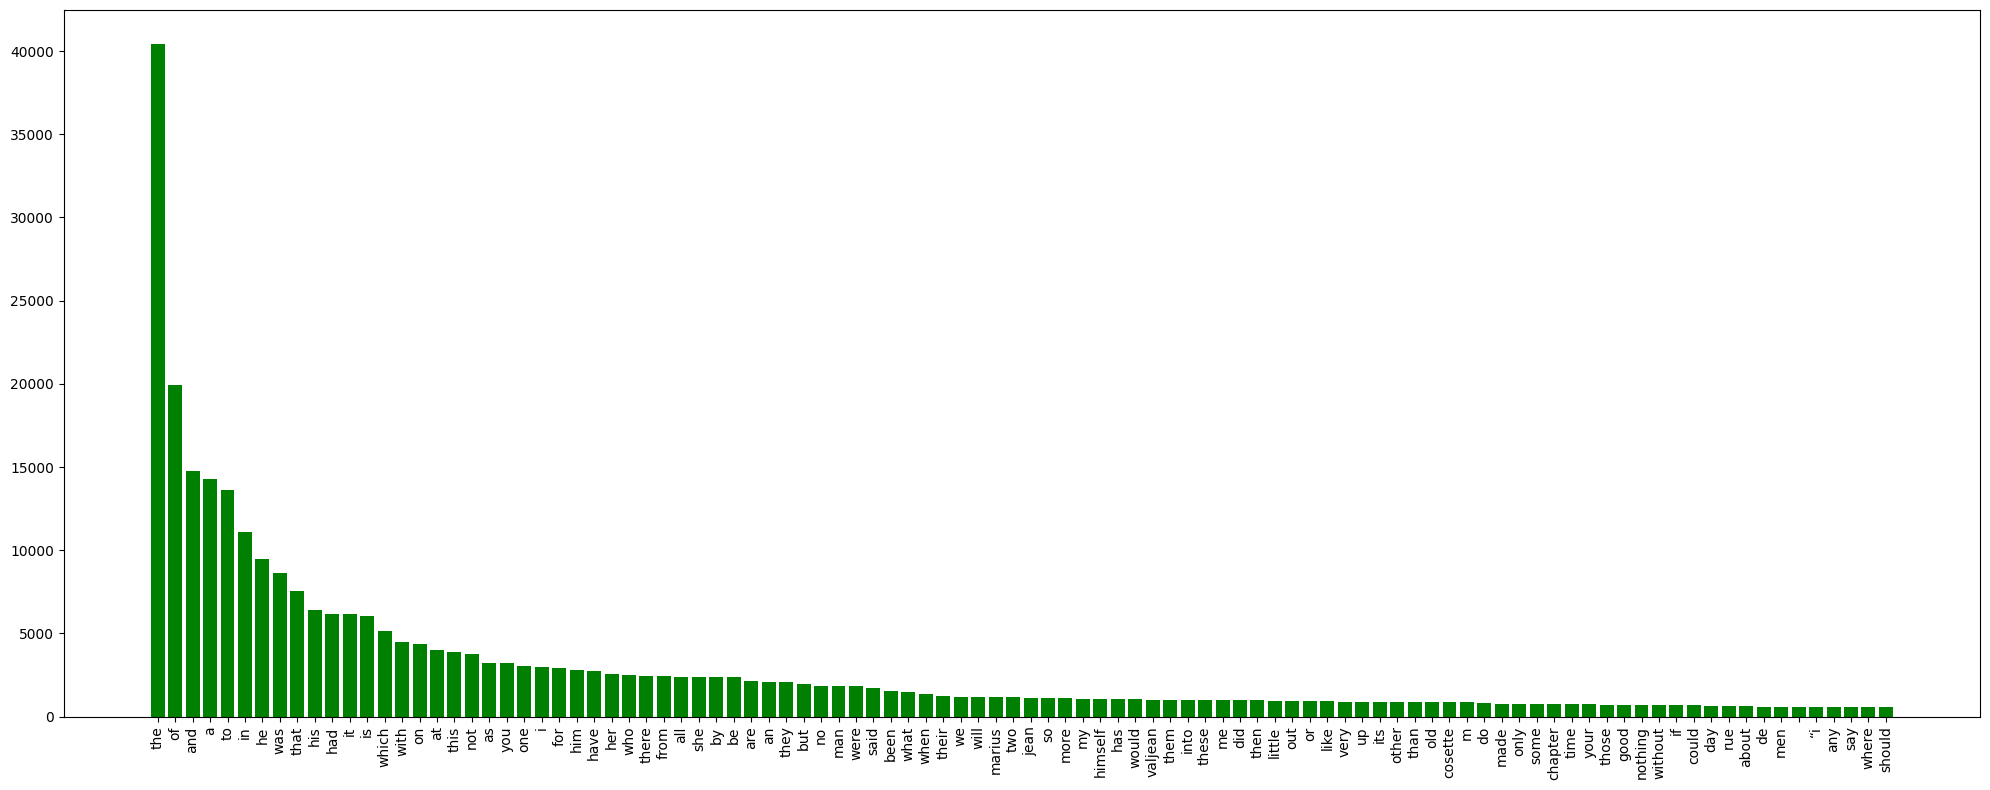

In [7]:
#graficamos
plt.figure(figsize=(20,8))
plt.bar(list(top_100.keys()), top_100.values(), color='g')
plt.xticks(rotation='vertical')
plt.tight_layout()

### Nube de palabras de las 100 mas frecuentes

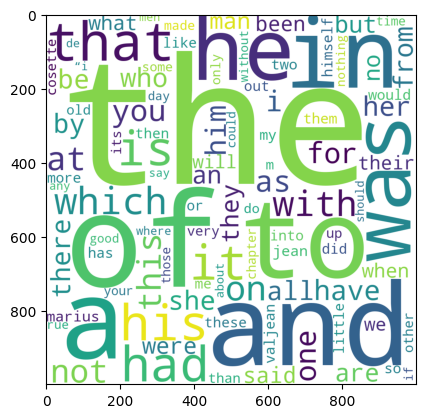

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(colf)
plt.imshow(wc)

## Bonus: (opcional)

### Creación de un diccionario de palabras.

In [9]:
diccionario = list(colf_sorted.keys())

### Realizar una corrección del texto con respecto al diccionario usando cálculo de distancia de “strings”.

In [47]:
def correcion(s1):
    distancias = [] #array que guardara cada una de las distancia, por cada palabra
    #calculamos distancia de levenshtein para cada palabra dentro del diccionario 
    for i in range(len(diccionario)):
        s2 = diccionario[i] # palabra del diccionario actual
        distance  = nltk.edit_distance(s1, s2, substitution_cost=1, transpositions=False) # calculo de distancia
        distancias.append(distance) # guardamos distancia
    index_min = np.argmin(distancias) # nos quedamos con el indice de la palabra con menor distancia
    return diccionario[index_min],distancias[index_min]


In [59]:
palabra = "caprishious"
palabra_corregida, distancia_edicion = correcion(palabra)
print(f'''
Palabra original: {palabra}
La correcion de su palabra es: {palabra_corregida}
Distancia de levenshtein de: {distancia_edicion}
''')


Palabra original: caprishious
La correcion de su palabra es: capricious
Distancia de levenshtein de: 2

